In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import json
import matplotlib.dates as mdates
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
import psycopg2
import xlsxwriter

import matplotlib.ticker as mtick
import matplotlib.dates as mdates

from google.cloud import bigquery
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/daniel.ryu/.config/gcloud/application_default_credentials.json'
bigquery_client = bigquery.Client(project='apprec-prod')

In [2]:
exchange = pd.read_csv('~/Documents/appreciate/exchanges.csv')
imp_type = pd.read_csv('~/Documents/appreciate/imp_type.csv')
buyer = pd.read_csv('~/Documents/appreciate/buyer.csv')
imp_type

impression type  imp_type_id
0          display            1
1            video            2
2           native            4
3     native video            8
4   rewarded video           16
5              IBV           32
6  rewarded banner           64

In [3]:
USERNAME = 'dryu'
PWD = 'VRyrf4cXDtccxT4b'
DB_HOST = [('olympus','olympus.ctbsm6jecdy0.us-west-2.redshift.amazonaws.com')
           ,('atlas','atlas.ctbsm6jecdy0.us-west-2.redshift.amazonaws.com')
          ,('verizon','rr.verizon.amer-ignite.digitalturbine.com')]

conn_olympus = psycopg2.connect(f"user={USERNAME} password={PWD} port = 5439 "
                                f"dbname={DB_HOST[0][0]} host={DB_HOST[0][1]}")
conn_atlas = psycopg2.connect(f"user={USERNAME} password={PWD} port = 5439 "
                              f"dbname={DB_HOST[1][0]} host={DB_HOST[1][1]}")
cur_olympus = conn_olympus.cursor()
cur_atlas = conn_atlas.cursor()

In [201]:
start_dt = '2021-06-30'
end_dt = '2021-07-19'
change_dt = '2021-07-08'
bug_start_dt = '2021-07-08'
bug_end_dt = '2021-07-11'


In [77]:
migration = pd.read_csv('files/Audience_Migration.csv')
phase1_campaigns = tuple(migration.loc[migration.Phase == 1, 'campaign_uuid'].drop_duplicates().to_list())
migration[migration.Phase == 1]

campaign_label                     campaign_uuid  \
1              Acorns  2a7180268472e12e108f95f44d9aecd0   
2              Acorns  6ff6be7b744204b50774c5c3acbcba6c   
3          Avia Games  9b07b6d96782e14112140ff402271326   
4               Bakkt  bb060be339c19246c78bdbe0cb940dec   
6               Bakkt  b44a069311e03ac9d132da94ddfb45bc   
10      Breaking News  fb9d2fdb882ea110d77ab74ffc35730a   
12      Breaking News  0c42ff2d9b5785a6b4a931b3dadb4368   
33               Kwai  dd8b3dacb176edba5c9d9ee6bafc1495   
34               Kwai  5fd6247512c203271087b04c4cc5e416   
67            Pandora  26ae46e908d03fbe20c01f7fd804a788   
70            Pandora  ba0b27afb4dbdaf333f43f8f13b9ee5d   
77             Papaya  1c27258e207d6b9c665a7f42e6a3a258   
82            Plarium  c12bc006bffbf770eba3a7212b979b21   
83            Plarium  3fb69f48d40b1e91a323886634296dbd   
86         Playsimple  90283d60f518d8bd21595a9341a52899   
87         Playsimple  3bf043901874bb0ef510dc88b8a764ad   
88         Playsimple  bf2889656216fe7f0191cb8ecbaba3e4   
90         Playsimple  77571de665ad3e48f6728d59600070bd   
91         Playsimple  32306faf44c94f31443228da180c50c7   
101   Position Mobile  4c7f5d9964abdca5793b3d48f13fe6f9   
102   Position Mobile  88d9d3f8ab16deb5dd8908b6cfa3278a   
105   Position Mobile  99c072bcbce58e7ef79a19d917ef8991   
112     Rewarded Play  ebaef6f00019bc072cae96b5052f62d2   
115             Ripio  ff53565005448c10ef8764492889feb7   
116             Ripio  95c9f78979531cb5b6d4aa49aadaec51   
189          Weedmaps  6d0ea0055c10d071fdac35d6b76f72b0   
190          Weedmaps  4c2507672d44889680be77f2422c91ac   
191  WildCard Studios  ba491fbe7c6edef02cd9dbdd5f374042   
193  WildCard Studios  f262574d5036af13dd7fa25cdae7485f   

                                       campaign_name Migrate  Phase  \
1                         Android-Acorns-Acorns-US-2       Y    1.0   
2                         Android-Acorns-Acorns-US-3       Y    1.0   
3                 Android-Avia Games-Avia Games-US-2       Y    1.0   
4                 Android-Realtime Agency-Bakkt-US-2       Y    1.0   
6                 Android-Realtime Agency-Bakkt-US-3       Y    1.0   
10            Android-Amply Media-Breaking News-US-2       Y    1.0   
12            Android-Amply Media-Breaking News-US-3       Y    1.0   
33                        Kwai - Kwai - BR - UA - GP       Y    1.0   
34                             Kwai - Kwai - BR - UA       Y    1.0   
67                        Pandora - Pandora - US - 3       Y    1.0   
70                      Pandora - Pandora - US - VZW       Y    1.0   
77           Papaya Games - Solitaire Cash - US - UA       Y    1.0   
82                         Android-Plarium-Raid-US-3       Y    1.0   
83                         Android-Plarium-Raid-US-2       Y    1.0   
86        DT-SingleTap-DSP-PlaySimple-WordTrip-US-GP       Y    1.0   
87        DT-SingleTap-DSP-PlaySimple-WordTrip-US-UA       Y    1.0   
88             DT-SingleTap-DSP-PlaySimple-DTC-US-UA       Y    1.0   
90             DT-SingleTap-DSP-PlaySimple-DTC-US-GP       Y    1.0   
91    DT-SingleTap-DSP-PlaySimple-WordTrip-US-UA-VZW       Y    1.0   
101         Position Mobile – Weather Home – US – UA       Y    1.0   
102         Position Mobile - Weather Home - US - GP       Y    1.0   
105            Position Mobile-Weather Home-US-2-SAD       Y    1.0   
112           Blind Ferret - Rewarded Play - US - UA       Y    1.0   
115                         Android-Ripio-Ripio-AR-3       Y    1.0   
116                         Android-Ripio-Ripio-AR-2       Y    1.0   
189                          Weedmaps-Weedmaps-US-GP       Y    1.0   
190                          Weedmaps-Weedmaps-US-UA       Y    1.0   
191  Android-WildCard Studios-Ultimate Cribbage-US-3       Y    1.0   
193  Android-WildCard Studios-Ultimate Cribbage-US-2       Y    1.0   

          Done (PDT)  Unnamed: 6  Uncapped/Not capping  \
1     7/8/21 9:47 AM         NaN               

In [78]:
# export from datalake
failure_rates = pd.read_csv('files/bug_failure_rates_7.7-11.csv')
failure_rates['date'] = pd.to_datetime(failure_rates['date'])
failure_rates

date                   packagename  failures  successes  failure_rate
0  2021-07-08    jp.gocro.smartnews.android     18394      53770      0.254892
1  2021-07-08           com.twitter.android     15703      89116      0.149811
2  2021-07-07           com.twitter.android      3099     115808      0.026062
3  2021-07-09           com.twitter.android      3035     201473      0.014840
4  2021-07-07    jp.gocro.smartnews.android      2715     102953      0.025694
..        ...                           ...       ...        ...           ...
63 2021-07-07   com.amelosinteractive.snake       132        432      0.234043
64 2021-07-11  com.etermax.preguntados.lite       113        353      0.242489
65 2021-07-11    jp.gocro.smartnews.android       110      87183      0.001260
66 2021-07-07         com.tripledot.woodoku       102     111363      0.000915
67 2021-07-11           com.quok.blobRunner       101       1187      0.078416

[68 rows x 5 columns]

In [193]:
failure_rates['high_failure'] = failure_rates.failure_rate > .2
pivot = failure_rates.pivot_table(values = ['failures','successes'], index = 'date', aggfunc = np.sum)
pivot['failure_rate'] = pivot['failures']/(pivot.failures + pivot.successes)
pivot

failures  successes  failure_rate
date                                         
2021-07-08      6026      84171      0.066809
2021-07-09      9152      84300      0.097933
2021-07-10      8440      94200      0.082229
2021-07-11      1920       3933      0.328037

In [82]:
phase1_campaigns = [x for x in phase1_campaigns if x in df_stats.ssb_campaign_uuid.to_list()]
phase1_packages = df_stats.loc[(df_stats.ssb_campaign_uuid.isin(phase1_campaigns)), 'sponsored_bnd'].unique().tolist()
phase1_packages

['in.crossy.daily_crossword',
 'com.papaya.solitairecash',
 'com.kwai.video',
 'com.weedmaps.app.android',
 'com.ripio.android',
 'com.plarium.raidlegends',
 'com.acorns.android',
 'com.pandora.android',
 'com.bakkt.wallet.consumer',
 'com.home.weather.radar',
 'com.breakingnewsbrief.app',
 'in.playsimple.wordtrip',
 'com.affinity.rewarded_play',
 'com.trivialtechnology.Cribbage']

In [85]:
# export from datalake
failure_rates = pd.read_csv('files/bug_failure_rates_7.7-11.csv')
failure_rates['date'] = pd.to_datetime(failure_rates['date'])
failure_rates

date                     packagename  failures  successes  \
0  2021-07-09               com.ripio.android      2467        357   
1  2021-07-10               com.ripio.android      2271        305   
2  2021-07-08  com.trivialtechnology.Cribbage      2111        403   
3  2021-07-09  com.trivialtechnology.Cribbage      1818        328   
4  2021-07-11              com.acorns.android      1744        310   
5  2021-07-10              com.acorns.android      1635        317   
6  2021-07-08              com.acorns.android      1613        354   
7  2021-07-10  com.trivialtechnology.Cribbage      1398        375   
8  2021-07-09              com.acorns.android      1373        276   
9  2021-07-09                  com.kwai.video      1286      78854   
10 2021-07-10         com.plarium.raidlegends      1145       1312   
11 2021-07-09      com.affinity.rewarded_play      1141       3060   
12 2021-07-09         com.plarium.raidlegends      1067       1425   
13 2021-07-10                  com.kwai.video      1011      88879   
14 2021-07-10      com.affinity.rewarded_play       980       3012   
15 2021-07-08      com.affinity.rewarded_play       898       2940   
16 2021-07-08                  com.kwai.video       614      77998   
17 2021-07-08               com.ripio.android       466        146   
18 2021-07-08         com.plarium.raidlegends       324       2330   
19 2021-07-11      com.affinity.rewarded_play       176       3623   

    failure_rate  
0       0.873584  
1       0.881599  
2       0.839698  
3       0.847158  
4       0.849075  
5       0.837602  
6       0.820031  
7       0.788494  
8       0.832626  
9       0.016047  
10      0.466015  
11      0.271602  
12      0.428170  
13      0.011247  
14      0.245491  
15      0.233976  
16      0.007811  
17      0.761438  
18      0.122080  
19      0.046328

In [59]:
def calc_metrics(df):
    df['ctr'] = 100*df['clicks']/df['impressions']
    df['ir'] = 100*df['installs']/df['clicks']
    df['ipm'] = 1000*df['installs']/df['impressions']
    df['cpm'] = 1000*df['cost']/df['impressions']
    df['margin'] = 100*(df['spend'] - df['cost'])/df['spend']
    return df[['impressions','clicks','ctr','installs','ir','ipm','cpm','spend','cost','margin']]

In [222]:
format_map = {'impressions':'{:,.0f}'
             ,'clicks':'{:,.0f}'
             ,'installs':'{:,.0f}'
             ,'spend':'${:,.0f}'
             ,'cost':'${:,.0f}'
             ,'ipm':'{:,.2f}'
             ,'ctr':'{:,.1f}%'
             ,'ir':'{:,.1f}%'
             ,'margin':'{:,.1f}%'}

In [209]:
df_stats = bigquery_client.query(f"""
select
    c.name as campaign_name
    , r.ssb_campaign_uuid
    , p.bundle as hosting_bnd
    , sp.name as sponsored_app_name
    , sp.bundle as sponsored_bnd
    , r.exchange_id
    , ad_type
    , date
    , r.imp_type
    , r.ad_size
    , count(case when event_type = 'clear' then 1 else NULL end)*4 as impressions
    , count(case when event_type = 'click' then 1 else NULL end)*4 as clicks
    , count(case when event_type = 'install' then 1 else NULL end)*4 as installs
    , sum(case when event_type = 'install' then revenue else 0 end)*4 as spend
    , sum(case when event_type = 'clear' then settlement_price else 0 end)*4/1000 as cost
    , sum(case when event_type = 'clear' then bid_price else 0 end)*4/1000 as bid
from stats.rows1 r
left join metadata.campaigns c
    on r.ssb_campaign_uuid = c.uuid  
join metadata.apps p
    on r.hosting_app_id = p.app_id
join metadata.apps sp
    on r.sponsored_app_id = sp.app_id
where 
    date >= '{start_dt}'
    and date <= '{end_dt}'
    and right(r.id,1) in ('0','1','2','3')
    and r.ssb_campaign_uuid in {tuple(phase1_campaigns)}
group by 1,2,3,4,5,6,7,8,9,10
""").to_dataframe()
df_stats = df_stats.set_index('exchange_id').join(exchange.set_index('exchange_id'), how = 'left').reset_index()
df_stats = df_stats.set_index('imp_type').join(imp_type.set_index('imp_type_id'), how = 'left').reset_index()
df_stats = df_stats.set_index(['date','hosting_bnd']).join(failure_rates.set_index(['date','packagename'])).reset_index()
df_stats

date                                        hosting_bnd  \
0       2021-06-30                                    com.scopely.yux   
1       2021-06-30                               com.loop.matchtile3d   
2       2021-06-30                              com.grindrapp.android   
3       2021-06-30  paint.by.number.pixel.art.coloring.drawing.puzzle   
4       2021-06-30                                com.fiogonia.spades   
...            ...                                                ...   
3326051 2021-07-19                  com.samsung.android.game.gamehome   
3326052 2021-07-19                    com.sec.android.app.samsungapps   
3326053 2021-07-19                  com.samsung.android.game.gamehome   
3326054 2021-07-19                  com.samsung.android.game.gamehome   
3326055 2021-07-19                    com.sec.android.app.samsungapps   

        packagename  index  exchange_id  \
0               NaN    1.0            1   
1               NaN    1.0            1   
2               NaN    1.0            1   
3               NaN    1.0            1   
4               NaN    1.0            1   
...             ...    ...          ...   
3326051         NaN   16.0           59   
3326052         NaN   16.0           59   
3326053         NaN   16.0           59   
3326054         NaN   16.0           59   
3326055         NaN   16.0           59   

                                          campaign_name  \
0               Papaya Games - Solitaire Cash - US - UA   
1               Papaya Games - Solitaire Cash - US - UA   
2               Papaya Games - Solitaire Cash - US - UA   
3               Papaya Games - Solitaire Cash - US - UA   
4               Papaya Games - Solitaire Cash - US - UA   
...                                                 ...   
3326051                      Pandora - Pandora - US - 3   
3326052      DT-SingleTap-DSP-PlaySimple-WordTrip-US-UA   
3326053      DT-SingleTap-DSP-PlaySimple-WordTrip-US-UA   
3326054  DT-SingleTap-DSP-PlaySimple-WordTrip-US-UA-VZW   
3326055  DT-SingleTap-DSP-PlaySimple-WordTrip-US-UA-VZW   

                        ssb_campaign_uuid  \
0        1c27258e207d6b9c665a7f42e6a3a258   
1        1c27258e207d6b9c665a7f42e6a3a258   
2        1c27258e207d6b9c665a7f42e6a3a258   
3        1c27258e207d6b9c665a7f42e6a3a258   
4        1c27258e207d6b9c665a7f42e6a3a258   
...                                   ...   
3326051  26ae46e908d03fbe20c01f7fd804a788   
3326052  3bf043901874bb0ef510dc88b8a764ad   
3326053  3bf043901874bb0ef510dc88b8a764ad   
3326054  32306faf44c94f31443228da180c50c7   
3326055  32306faf44c94f31443228da180c50c7   

                                  sponsored_app_name  \
0                                     solitaire cash   
1                                     solitaire cash   
2                                     solitaire cash   
3                                     solitaire cash   
4                                     solitaire cash   
...                                              ...   
3326051  Pandora - Streaming Music, Radio & Podcasts   
3326052                                    Word Trip   
3326053                                    Word Trip   
3326054                                    Word Trip   
3326055                                    Word Trip   

                    sponsored_bnd ad_type  ... installs  spend      cost  \
0        com.papaya.solitairecash   inter  ...        0    0.0  0.150902   
1        com.papaya.solitairecash  banner  ...        0    0.0  1.790092   
2        com.papaya.solitairecash  banner  ...        0    0.0  7.621648   
3        com.papaya.solitairecash  banner  ...        0    0.0  1.737235   
4        com.papaya.solitairecash   inter  ...        0    0.0  1.714535   
...                           ...     ...  ...      ...    ...       ...   
3326051       com.pandora.android   inter  ...        0    0.0  0.962840   
3326052    in.playsimple.wordtrip   inter  ...        0    0.0  0.021060   
3326053    in

In [212]:
phase1_campaigns = [x for x in phase1_campaigns if x in df_stats.ssb_campaign_uuid.to_list()]
phase1_packages = df_stats.loc[(df_stats.ssb_campaign_uuid.isin(phase1_campaigns)), 'sponsored_bnd'].unique().tolist()
phase1_packages

['com.papaya.solitairecash',
 'com.kwai.video',
 'com.ripio.android',
 'com.plarium.raidlegends',
 'com.acorns.android',
 'com.pandora.android',
 'com.home.weather.radar',
 'com.breakingnewsbrief.app',
 'in.playsimple.wordtrip',
 'com.affinity.rewarded_play',
 'in.crossy.daily_crossword',
 'com.weedmaps.app.android',
 'com.bakkt.wallet.consumer',
 'com.trivialtechnology.Cribbage']

In [213]:
filters =  (df_stats.failure_rate > .2)
df_stats[filters].groupby('date')['impressions'].sum()

date
2021-07-08    43419552
2021-07-09    56264700
2021-07-10    52345940
2021-07-11    10382624
Name: impressions, dtype: int64

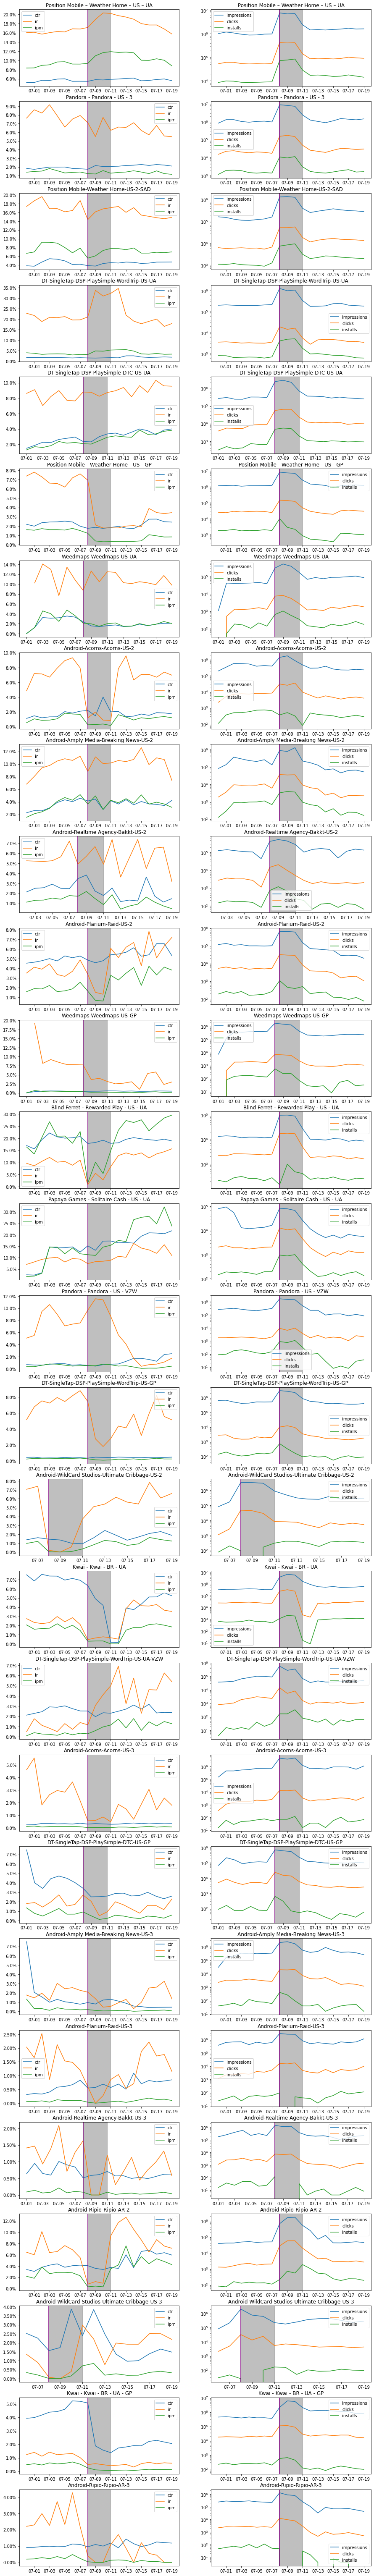

In [236]:
top_campaigns = df_stats.groupby(['campaign_name'])['spend'].sum().sort_values(ascending = False).index.tolist()
fig, ax = plt.subplots(len(top_campaigns),2, figsize = (15, 4*len(top_campaigns)))

for i in range(len(top_campaigns)):
    c_name = top_campaigns[i]
    c = df_stats.loc[df_stats.campaign_name == c_name, 'ssb_campaign_uuid'].unique()[0]
    c_bug_start = bug_start_dt
    c_bug_end = bug_end_dt
    
    filters = (df_stats.ssb_campaign_uuid == c)
    pivot = df_stats[filters].pivot_table(values = ['impressions','clicks','installs','spend','cost'], index = 'date', aggfunc = np.sum)
    format_pivot = calc_metrics(pivot)
    
    # recursively edit the start and end of the bug where the IR isn't lower, until there is no change
#     no_change = False
#     while c_bug_start != c_bug_end and no_change == False:
#         day_before_bug = (pd.to_datetime(c_bug_start)-datetime.timedelta(days=1)).strftime('%Y-%m-%d')
#         day_after_bug = (pd.to_datetime(c_bug_end)+datetime.timedelta(days=1)).strftime('%Y-%m-%d')
#         day_before_bug_ir = pivot.loc[pivot.index == day_before_bug, 'ir'].values[0]
#         day_after_bug_ir = pivot.loc[pivot.index == day_after_bug, 'ir'].values[0]
#         bug_start_ir = pivot.loc[pivot.index == c_bug_start, 'ir'].values[0] 
#         bug_end_ir = pivot.loc[pivot.index == c_bug_end, 'ir'].values[0] 

#         if day_before_bug_ir * .5 < bug_start_ir and pd.to_datetime(c_bug_start) != pd.to_datetime(c_bug_end):
#             df_stats['bug'] = np.where((df_stats.date == c_bug_start) & (df_stats.ssb_campaign_uuid == c), False, df_stats.bug)
#             c_bug_start = df_stats.loc[(df_stats.bug == True) & (df_stats.ssb_campaign_uuid == c), 'date'].min()        
#         elif day_after_bug_ir * .5 < bug_end_ir and pd.to_datetime(c_bug_start) != pd.to_datetime(c_bug_end):
#             df_stats['bug'] = np.where((df_stats.date == c_bug_end) & (df_stats.ssb_campaign_uuid == c), False, df_stats.bug)    
#             c_bug_end = df_stats.loc[(df_stats.bug == True) & (df_stats.ssb_campaign_uuid == c), 'date'].max()   
#         else:
#             no_change = True

    ax[i,0].set_title(c_name)
    ax[i,0].plot(format_pivot[['ctr','ir','ipm']])
    ax[i,0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax[i,0].yaxis.set_major_formatter(mtick.PercentFormatter(100))
    ax[i,0].axvline(x=datetime.datetime.strptime(change_dt, '%Y-%m-%d'), color = 'purple')
    ax[i,0].legend(['ctr','ir','ipm'])
    ax[i,0].axvspan(c_bug_start, c_bug_end, alpha=0.5, color='grey')
   
    ax[i,1].set_title(c_name)
    ax[i,1].plot(format_pivot[['impressions','clicks','installs']])
    ax[i,1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax[i,1].axvline(x=datetime.datetime.strptime(change_dt, '%Y-%m-%d'), color = 'purple')
    ax[i,1].legend(['impressions','clicks','installs'])
    ax[i,1].set_yscale('log')
    ax[i,1].axvspan(c_bug_start, c_bug_end, alpha=0.5, color='grey')



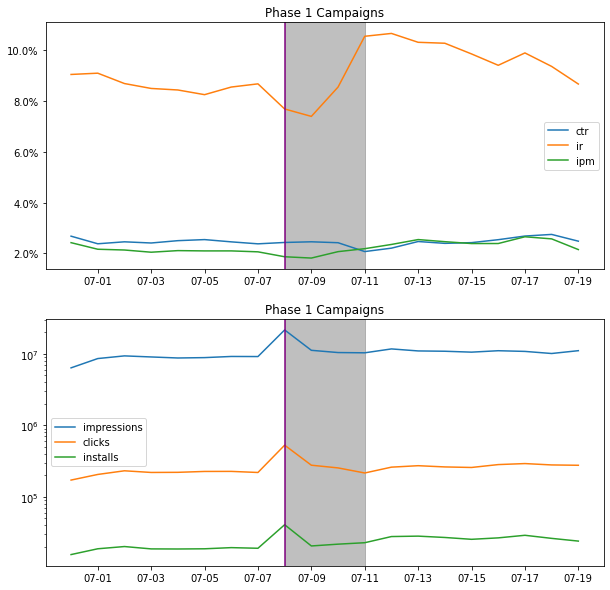

In [226]:
filters = (df_stats.ssb_campaign_uuid.isin(phase1_campaigns)) & ((df_stats.failure_rate < .2)|(df_stats.failure_rate.isna()))
pivot = df_stats[filters].pivot_table(values = ['impressions','clicks','installs','spend','cost'], index = 'date', aggfunc = np.sum)
format_pivot = calc_metrics(pivot)

fig, ax = plt.subplots(2,1, figsize = (10,10))
ax[0].set_title('Phase 1 Campaigns')
ax[0].plot(format_pivot[['ctr','ir','ipm']])
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(100))
ax[0].axvline(x=datetime.datetime.strptime(change_dt, '%Y-%m-%d'), color = 'purple')
ax[0].legend(['ctr','ir','ipm'])
ax[0].axvspan(datetime.datetime.strptime(bug_start_dt, '%Y-%m-%d'), datetime.datetime.strptime(bug_end_dt, '%Y-%m-%d'), alpha=0.5, color='grey')

ax[1].set_title('Phase 1 Campaigns')
ax[1].plot(format_pivot[['impressions','clicks','installs']])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax[1].axvline(x=datetime.datetime.strptime(change_dt, '%Y-%m-%d'), color = 'purple')
ax[1].legend(['impressions','clicks','installs'])
ax[1].set_yscale('log')
ax[1].axvspan(datetime.datetime.strptime(bug_start_dt, '%Y-%m-%d'), datetime.datetime.strptime(bug_end_dt, '%Y-%m-%d'), alpha=0.5, color='grey')


In [216]:
def classify_dates(r):
    if r.date < pd.to_datetime(bug_start_dt):
        return 'pre'
    elif r.date > pd.to_datetime(bug_end_dt):
        return 'post'
    else:
        return np.nan
df_stats['date_range'] = df_stats.apply(lambda x:classify_dates(x), axis=1)
df_stats['date_range'].value_counts()

post    733323
pre     692449
Name: date_range, dtype: int64

In [219]:
df_stats.groupby(['date_range','date'])['spend'].sum()

date_range  date      
post        2021-07-12    49298.2
            2021-07-13    48238.4
            2021-07-14    46266.4
            2021-07-15    43993.6
            2021-07-16    46522.4
            2021-07-17    50118.8
            2021-07-18    46145.2
            2021-07-19    42003.4
pre         2021-06-30    25411.2
            2021-07-01    32896.6
            2021-07-02    37940.0
            2021-07-03    37403.8
            2021-07-04    36859.8
            2021-07-05    37750.6
            2021-07-06    38885.0
            2021-07-07    37662.2
Name: spend, dtype: float64

In [223]:
pivot = df_stats.groupby('date_range')['impressions','clicks','installs','spend','cost'].sum()
format_pivot = calc_metrics(pivot)
format_pivot.style.format(format_map)

<ipython-input-223-338d522eb8f9>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pivot = df_stats.groupby('date_range')['impressions','clicks','installs','spend','cost'].sum()


In [235]:
pivot = df_stats.groupby(['campaign_name','date_range'])['impressions','clicks','installs','spend','cost'].sum()
format_pivot = calc_metrics(pivot)
format_pivot.loc[top_campaigns].style.format(format_map)

<ipython-input-235-514815e064b4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pivot = df_stats.groupby(['campaign_name','date_range'])['impressions','clicks','installs','spend','cost'].sum()
